## Alexander's Test Script

In [42]:
from model import *
import csv

# My Imports
import pandas as pd
from scipy.stats import pareto

In [193]:
r_incomes = []
incomes = []
counts = []

# TODO : Use pandas from CSV ?
with open('incomes.csv') as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader:
        r_incomes.append(row)
        incomes.append([int(row[0]) * 1000 / 12, int(row[1]) * 1000 / 12])
        counts.append(int(row[2]))

cum_counts = []
for i in range(len(counts)):
    cum_counts.append(sum(counts[:i + 1]))

hhld_count = sum(counts)

cum_ratios = [x / hhld_count for x in cum_counts]


# Plotting the Data

<AxesSubplot:title={'center':'Income Distribution'}>

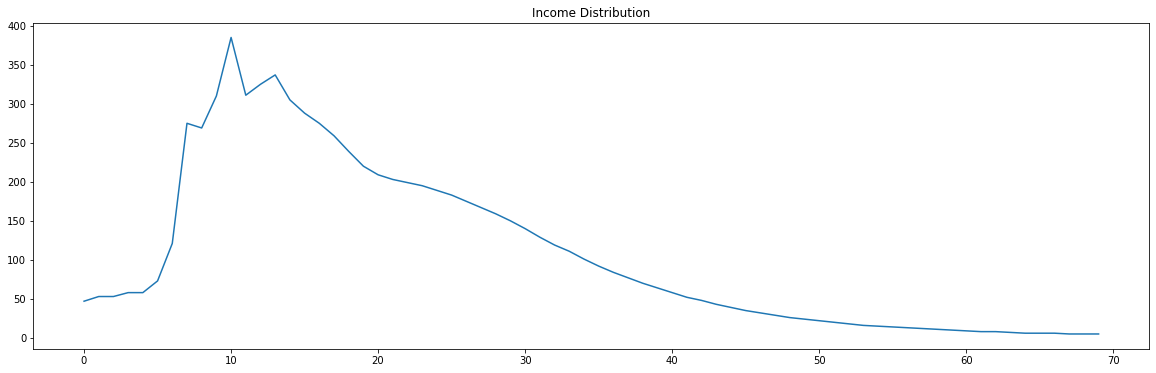

In [202]:
ri = pd.DataFrame(r_incomes, columns=['LI', 'HI', 'N']).astype(int)
ri.N.plot(figsize=(20,6), title='Income Distribution')

In [204]:
""" Analysing the Income """
m_incomes = pd.DataFrame(incomes, columns=['Income1', 'Income2'])
# m_incomes.Income1.plot.hist(bins=100, title="Distribution of Income", figsize=(20,5))
print(f'Income Shape = {m_incomes.Income1.shape}')
print(f'Minimum Monthly Income = {m_incomes.Income1.min()}')
print(f'Maximum Monthly Income = {m_incomes.Income1.max()}')


Income Shape = (70,)
Minimum Monthly Income = 0.0
Maximum Monthly Income = 11500.0


In [150]:
tcum_ratios = pd.DataFrame(cum_ratios)
# m_incomes.Income1.plot.hist(bins=100, title="Distribution of Cumulative Ratios", figsize=(20,5))
print(f'Income Shape = {m_incomes.Income1.shape}')
print(f'Minimum Monthly Income = {m_incomes.Income1.min()}')
print(f'Maximum Monthly Income = {m_incomes.Income1.max()}')

Income Shape = (70,)
Minimum Monthly Income = 0.0
Maximum Monthly Income = 11500.0


## Generating Incomes based on the Pareto Distribution
Average Household Income in the Netherlands : https://www.google.com/search?client=safari&rls=en&q=mean+household+income+netherlands&ie=UTF-8&oe=UTF-8
Interesting Read : How to Generate Pareto Distributed Variables : https://towardsdatascience.com/generating-pareto-distribution-in-python-2c2f77f70dbf
Doc scipy.stats.pareto : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html
#### Pareto PDF:

$ f(x, b) = \frac{b}{x^{b+1}}$ , $x \geq 1,  b > 1 $

Minimum Monthly Income = 0
Maximum Monthly Income ~ 12K

In [190]:
"""
Average Household Monthly Income ~ 2600 : according to source
Pareto Distribution Parameters
b : shape parameter of the Pareto Distribution
"""
b = 1.355   # played around until mean was ~ 2600 : Increase Sample size for more accurate estimate
size = 10_000
in1 = pareto.rvs(b=b, size=size) * 1000 - 800

hist_distribution = pd.DataFrame(np.histogram(in1, bins=70)).T
hist_distribution.rename(columns={1: "Income", 0: "N"}, inplace=True)
hist_distribution.set_index('Income', inplace=True )
hist_distribution.dropna(inplace=True)
hist_distribution.dropna(inplace=True)
hist_distribution.index = hist_distribution.index.astype(int)
hist_distribution.N = hist_distribution.N.astype(int)
hist_distribution

,N
Income,
200,9499
8345,298
16490,78
24636,46
32781,22
...,...
529647,0
537793,0
545938,0


In [142]:
incomes_p_list = []
for inx, row in incomes_p.iterrows():
    incomes_p_list.append([row.Income1, row.Income2])
cum_ratios

[0.006120588618309676,
 0.013022528975126969,
 0.019924469331944264,
 0.027477536137517907,
 0.03503060294309155,
 0.044537049094934236,
 0.06029430915483787,
 0.09610626383643704,
 0.13113686677952857,
 0.1715067066024222,
 0.221643443156661,
 0.2621435082693059,
 0.30446672743846853,
 0.34835265008464644,
 0.3880713634587837,
 0.42557624690714935,
 0.46138820158874855,
 0.4951165516343274,
 0.5262403958848808,
 0.5548899596301602,
 0.5821070451881756,
 0.6085427790076833,
 0.6344576116681859,
 0.6598515431696835,
 0.6844641229326736,
 0.7082953509571559,
 0.731084776663628,
 0.7528324000520901,
 0.773538221122542,
 0.7930720145852325,
 0.8113035551504102,
 0.828102617528324,
 0.8435994270087251,
 0.858054434171116,
 0.8712071884359943,
 0.8831879150931111,
 0.8941268394322177,
 0.9041541867430655,
 0.9132699570256544,
 0.9216043755697356,
 0.9291574423753093,
 0.9359291574423753,
 0.9421799713504363,
 0.9477796588097408,
 0.9528584451100404,
 0.9574163302513348,
 0.9615835395233754,


------------------------------------------------------------------------------------------------------------------------------
## Run Model with given Incomes & Cumulative Ratios

In [143]:
model = HousingMarket(rental_cost=2000, incomes=incomes, income_distr=cum_ratios)
model.run_model(20000)
data = model.datacollector
data

In [144]:
mv = data.get_model_vars_dataframe()    # mv : 'model variables'

------------------------------------------------------------------------------------------------------------------------------
## Plotting Model Parameters

Index(['Overall Savings', 'Gini', 'Mean Income'], dtype='object')

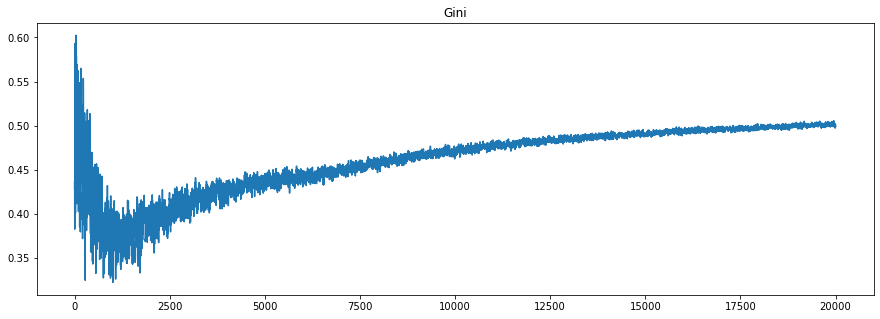

In [145]:
mv.Gini.plot(figsize=(15,5), title='Gini')
mv.columns

<AxesSubplot:title={'center':'Overall Savings'}>

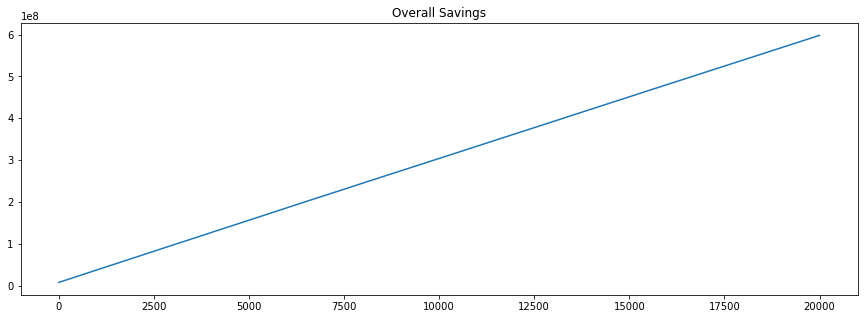

In [146]:
mv['Overall Savings'].plot(figsize=(15,5), title='Overall Savings')

<AxesSubplot:title={'center':'Mean Income'}>

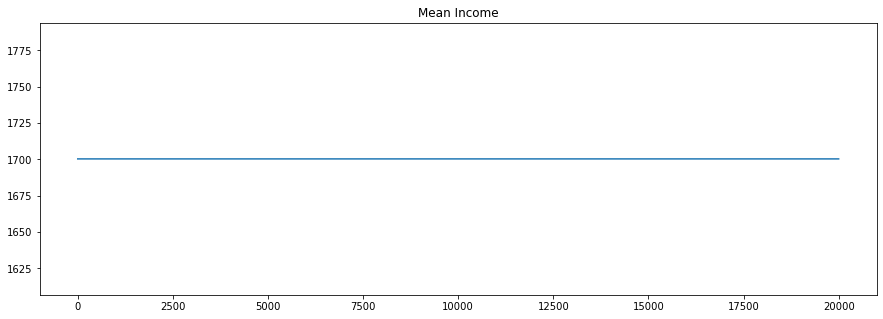

In [147]:
mv['Mean Income'].plot(figsize=(15, 5), title='Mean Income')